In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
np.__version__

'1.22.4'

In [3]:
#!pip install "numpy>=1.16.5,<1.23.0"
#!conda install "numpy>=1.16.5,<1.23.0"

In [4]:
df = pd.read_csv('train.csv')

In [130]:
df.sample(5).T

,45896,5927,70707,53110,12361
log_price,3.988984,3.806662,4.859812,4.127134,5.010635
room_type,Private room,Private room,Private room,Private room,Entire home/apt
accommodates,2,2,1,2,2
bathrooms,1.0,1.0,1.0,1.0,1.0
bed_type,Real Bed,Real Bed,Real Bed,Real Bed,Real Bed
cancellation_policy,flexible,strict,flexible,flexible,flexible
cleaning_fee,False,True,True,False,False
city,Boston,LA,NYC,NYC,NYC
host_has_profile_pic,t,t,t,t,t
host_identity_verified,t,t,f,f,t


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

### 확실히 불필요한 특성 제거 (url, 숙소 소개 등)

In [7]:
df.drop(['name', 'description', 'thumbnail_url', 'zipcode'], axis = 1, inplace = True)

In [8]:
df.drop('id', axis = 1, inplace = True)

    id                       -> 삭제
    log_price                -> *****타깃*****
    property_type            ->
    room_type                -> 변수 3개 one hot encoding
    amenities                -> amenities_count로 바꿈 (삭제)
    accommodates             -> 
    bathrooms
    bed_type
    cancellation_policy
    cleaning_fee
    city
    first_review
    host_has_profile_pic
    host_identity_verified
    host_response_rate
    host_since
    instant_bookable
    last_review
    latitude
    longitude
    neighbourhood
    number_of_reviews
    review_scores_rating       ->
    bedrooms
    beds

In [9]:
df.isnull().sum()

log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
bedrooms                     91
beds                        131
dtype: int64

In [10]:
np.exp(df['log_price'])

0        150.0
1        169.0
2        145.0
3        750.0
4        115.0
         ...  
74106    100.0
74107    155.0
74108    185.0
74109    195.0
74110    128.0
Name: log_price, Length: 74111, dtype: float64

In [11]:
df2 = df.copy()

### amenities를 항목의 개수로 변환

In [12]:
df['amenities_count'] = [len(df['amenities'][i].split(',')) for i, j in enumerate(df['amenities'])]

In [13]:
df.drop('amenities', axis = 1, inplace = True)

### neighborhood 컬럼을 삭제

In [14]:
df.drop('neighbourhood', axis = 1, inplace = True)

### review관련한 컬럼을 삭제 (일단은)

In [15]:
df.drop(['number_of_reviews', 'review_scores_rating', 'first_review', 'last_review'], axis = 1, inplace = True)

In [16]:
df

,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,latitude,longitude,bedrooms,beds,amenities_count
0,5.010635,Apartment,Entire home/apt,3,1.0,Real Bed,strict,True,NYC,t,t,NaN,2012-03-26,f,40.696524,-73.991617,1.0,1.0,9
1,5.129899,Apartment,Entire home/apt,7,1.0,Real Bed,strict,True,NYC,t,f,100%,2017-06-19,t,40.766115,-73.989040,3.0,3.0,15
2,4.976734,Apartment,Entire home/apt,5,1.0,Real Bed,moderate,True,NYC,t,t,100%,2016-10-25,t,40.808110,-73.943756,1.0,3.0,19
3,6.620073,House,Entire home/apt,4,1.0,Real Bed,flexible,True,SF,t,t,NaN,2015-04-19,f,37.772004,-122.431619,2.0,2.0,15
4,4.744932,Apartment,Entire home/apt,2,1.0,Real Bed,moderate,True,DC,t,t,100%,2015-03-01,t,38.925627,-77.034596,0.0,1.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,4.605170,Apartment,Private room,1,1.0,Real Bed,flexible,False,NYC,t,t,NaN,2013-03-24,f,40.709025,-73.939405,1.0,1.0,1
74107,5.043425,Apartment,Entire home/apt,4,2.0,Real Bed,moderate,True,LA,t,f,100%,2016-05-03,f,33.871549,-118.396053,2.0,4.0,16
74108,5.220356,Apartment,Entire home/apt,5,1.0,Real Bed,moderate,True,NYC,t,t,100%,2012-01-05,t,40.706749,-73.942377,2.0,2.0,31
74109,5.273000,Apartment,Entire home/apt,2,1.0,Real Bed,strict,True,NYC,t,f,100%,2017-09-17,t,40.738535,-74.000157,0.0,2.0,15


In [17]:
df.columns

Index(['log_price', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bed_type', 'cancellation_policy', 'cleaning_fee', 'city',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'latitude', 'longitude', 'bedrooms',
       'beds', 'amenities_count'],
      dtype='object')

## 원-핫 인코딩할 컬럼 선택하기
 - host_identity_verified : t / f (널값 188개)
 - room_type : 3개 항목, 널값 없음
 - instant_bookable : t / f (널값 없음)
 - bed_type : 5개 항목, 널값 없음

### host_response_rate : 수치형으로 변환

In [18]:
df['host_response_rate'].value_counts()

100%    43254
90%      2277
80%      1113
0%        883
50%       611
        ...  
39%         1
15%         1
31%         1
21%         1
6%          1
Name: host_response_rate, Length: 80, dtype: int64

In [19]:
df['host_response_rate'].unique()

array([nan, '100%', '71%', '68%', '67%', '83%', '50%', '90%', '86%',
       '92%', '82%', '80%', '89%', '93%', '99%', '0%', '88%', '96%',
       '70%', '94%', '91%', '25%', '95%', '98%', '62%', '29%', '33%',
       '81%', '63%', '38%', '60%', '79%', '78%', '75%', '65%', '97%',
       '87%', '40%', '54%', '53%', '58%', '76%', '30%', '64%', '17%',
       '20%', '77%', '73%', '41%', '59%', '57%', '85%', '56%', '42%',
       '44%', '35%', '14%', '74%', '27%', '10%', '84%', '6%', '72%',
       '36%', '55%', '43%', '13%', '39%', '46%', '26%', '61%', '52%',
       '23%', '22%', '69%', '66%', '15%', '11%', '31%', '21%', '47%'],
      dtype=object)

In [20]:
#df['host_response_rate'].isnull().sum()

In [21]:
df['host_response_rate']

0         NaN
1        100%
2        100%
3         NaN
4        100%
         ... 
74106     NaN
74107    100%
74108    100%
74109    100%
74110    100%
Name: host_response_rate, Length: 74111, dtype: object

In [22]:
df['host_response_rate'].fillna(0) #NaN값을 0으로 먼저 처리

0           0
1        100%
2        100%
3           0
4        100%
         ... 
74106       0
74107    100%
74108    100%
74109    100%
74110    100%
Name: host_response_rate, Length: 74111, dtype: object

In [23]:
df['host_response_rate2'] = df['host_response_rate'].str.replace('%', '')

In [24]:
df['host_response_rate2'].fillna(0, inplace = True)

In [25]:
df['host_response_rate2'] = df['host_response_rate2'].astype('int32')

In [26]:
df.drop('host_response_rate', axis = 1, inplace = True)

In [27]:
df

,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_has_profile_pic,host_identity_verified,host_since,instant_bookable,latitude,longitude,bedrooms,beds,amenities_count,host_response_rate2
0,5.010635,Apartment,Entire home/apt,3,1.0,Real Bed,strict,True,NYC,t,t,2012-03-26,f,40.696524,-73.991617,1.0,1.0,9,0
1,5.129899,Apartment,Entire home/apt,7,1.0,Real Bed,strict,True,NYC,t,f,2017-06-19,t,40.766115,-73.989040,3.0,3.0,15,100
2,4.976734,Apartment,Entire home/apt,5,1.0,Real Bed,moderate,True,NYC,t,t,2016-10-25,t,40.808110,-73.943756,1.0,3.0,19,100
3,6.620073,House,Entire home/apt,4,1.0,Real Bed,flexible,True,SF,t,t,2015-04-19,f,37.772004,-122.431619,2.0,2.0,15,0
4,4.744932,Apartment,Entire home/apt,2,1.0,Real Bed,moderate,True,DC,t,t,2015-03-01,t,38.925627,-77.034596,0.0,1.0,12,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,4.605170,Apartment,Private room,1,1.0,Real Bed,flexible,False,NYC,t,t,2013-03-24,f,40.709025,-73.939405,1.0,1.0,1,0
74107,5.043425,Apartment,Entire home/apt,4,2.0,Real Bed,moderate,True,LA,t,f,2016-05-03,f,33.871549,-118.396053,2.0,4.0,16,100
74108,5.220356,Apartment,Entire home/apt,5,1.0,Real Bed,moderate,True,NYC,t,t,2012-01-05,t,40.706749,-73.942377,2.0,2.0,31,100
74109,5.273000,Apartment,Entire home/apt,2,1.0,Real Bed,strict,True,NYC,t,f,2017-09-17,t,40.738535,-74.000157,0.0,2.0,15,100


<AxesSubplot: xlabel='host_response_rate2', ylabel='count'>

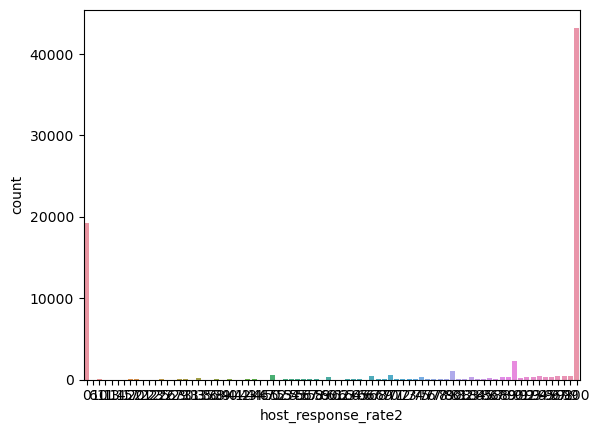

In [28]:
sns.countplot(x = df['host_response_rate2'])

In [30]:
#sns.boxplot(x = df['host_response_rate2'])df['host_response_rate2'].

In [31]:
df['host_response_rate2'].describe()

count    74111.000000
mean        71.055201
std         43.087044
min          0.000000
25%          0.000000
50%        100.000000
75%        100.000000
max        100.000000
Name: host_response_rate2, dtype: float64

In [32]:
df['host_response_rate2'].unique()

array([  0, 100,  71,  68,  67,  83,  50,  90,  86,  92,  82,  80,  89,
        93,  99,  88,  96,  70,  94,  91,  25,  95,  98,  62,  29,  33,
        81,  63,  38,  60,  79,  78,  75,  65,  97,  87,  40,  54,  53,
        58,  76,  30,  64,  17,  20,  77,  73,  41,  59,  57,  85,  56,
        42,  44,  35,  14,  74,  27,  10,  84,   6,  72,  36,  55,  43,
        13,  39,  46,  26,  61,  52,  23,  22,  69,  66,  15,  11,  31,
        21,  47], dtype=int32)

In [33]:
# 0을 100으로 채우기
df['host_response_rate2'].replace(0, 100, inplace = True)

<AxesSubplot: xlabel='host_response_rate2', ylabel='count'>

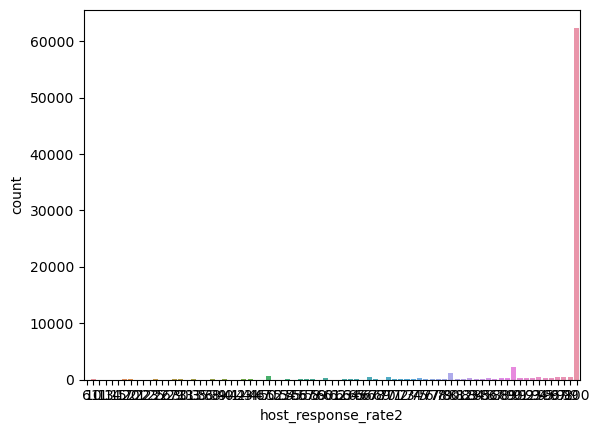

In [34]:
sns.countplot(x = df['host_response_rate2'])

In [35]:
df

,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_has_profile_pic,host_identity_verified,host_since,instant_bookable,latitude,longitude,bedrooms,beds,amenities_count,host_response_rate2
0,5.010635,Apartment,Entire home/apt,3,1.0,Real Bed,strict,True,NYC,t,t,2012-03-26,f,40.696524,-73.991617,1.0,1.0,9,100
1,5.129899,Apartment,Entire home/apt,7,1.0,Real Bed,strict,True,NYC,t,f,2017-06-19,t,40.766115,-73.989040,3.0,3.0,15,100
2,4.976734,Apartment,Entire home/apt,5,1.0,Real Bed,moderate,True,NYC,t,t,2016-10-25,t,40.808110,-73.943756,1.0,3.0,19,100
3,6.620073,House,Entire home/apt,4,1.0,Real Bed,flexible,True,SF,t,t,2015-04-19,f,37.772004,-122.431619,2.0,2.0,15,100
4,4.744932,Apartment,Entire home/apt,2,1.0,Real Bed,moderate,True,DC,t,t,2015-03-01,t,38.925627,-77.034596,0.0,1.0,12,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,4.605170,Apartment,Private room,1,1.0,Real Bed,flexible,False,NYC,t,t,2013-03-24,f,40.709025,-73.939405,1.0,1.0,1,100
74107,5.043425,Apartment,Entire home/apt,4,2.0,Real Bed,moderate,True,LA,t,f,2016-05-03,f,33.871549,-118.396053,2.0,4.0,16,100
74108,5.220356,Apartment,Entire home/apt,5,1.0,Real Bed,moderate,True,NYC,t,t,2012-01-05,t,40.706749,-73.942377,2.0,2.0,31,100
74109,5.273000,Apartment,Entire home/apt,2,1.0,Real Bed,strict,True,NYC,t,f,2017-09-17,t,40.738535,-74.000157,0.0,2.0,15,100


In [36]:
df['host_response_rate2'].unique()

array([100,  71,  68,  67,  83,  50,  90,  86,  92,  82,  80,  89,  93,
        99,  88,  96,  70,  94,  91,  25,  95,  98,  62,  29,  33,  81,
        63,  38,  60,  79,  78,  75,  65,  97,  87,  40,  54,  53,  58,
        76,  30,  64,  17,  20,  77,  73,  41,  59,  57,  85,  56,  42,
        44,  35,  14,  74,  27,  10,  84,   6,  72,  36,  55,  43,  13,
        39,  46,  26,  61,  52,  23,  22,  69,  66,  15,  11,  31,  21,
        47], dtype=int32)

In [37]:
len(df.columns)

19

### host_response_rate는 100으로 값이 너무 치우쳐져 있으니 삭제가 바람직해 보임

In [38]:
df.drop('host_response_rate2', axis = 1, inplace = True)

### host_identity_verified

In [39]:
df['host_identity_verified'].sample(20)

4001     t
21217    t
9801     f
52859    t
73937    f
39766    f
18415    t
32522    t
11032    t
21287    f
22328    t
59649    f
47781    t
48888    f
40422    f
39569    f
60208    f
37723    t
64731    t
27926    t
Name: host_identity_verified, dtype: object

In [40]:
df['host_identity_verified'].isnull().sum() #결측치 처리 필요

188

In [41]:
df['host_identity_verified'].value_counts()

t    49748
f    24175
Name: host_identity_verified, dtype: int64

#### property_type

In [42]:
df['property_type'].sample(20)

10148    Apartment
52824        House
25703         Loft
57191    Apartment
16167        House
60066        House
28330    Apartment
35884    Apartment
49850    Apartment
19339        House
71073        House
35083    Apartment
66258        House
63393        House
55878        House
67446        House
63638    Apartment
30915        House
54837    Apartment
32518    Apartment
Name: property_type, dtype: object

In [43]:
df['property_type'].value_counts()

Apartment             49003
House                 16511
Condominium            2658
Townhouse              1692
Loft                   1244
Other                   607
Guesthouse              498
Bed & Breakfast         462
Bungalow                366
Villa                   179
Dorm                    142
Guest suite             123
Camper/RV                94
Timeshare                77
Cabin                    72
In-law                   71
Hostel                   70
Boutique hotel           69
Boat                     65
Serviced apartment       21
Tent                     18
Castle                   13
Vacation home            11
Yurt                      9
Hut                       8
Treehouse                 7
Chalet                    6
Earth House               4
Tipi                      3
Train                     2
Cave                      2
Casa particular           1
Parking Space             1
Lighthouse                1
Island                    1
Name: property_type,

In [44]:
df['room_type'].value_counts()

Entire home/apt    41310
Private room       30638
Shared room         2163
Name: room_type, dtype: int64

In [45]:
df['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [46]:
df['room_type'].isnull().sum()

0

In [47]:
df['instant_bookable'].value_counts()

f    54660
t    19451
Name: instant_bookable, dtype: int64

In [48]:
df['instant_bookable'].isnull().sum()

0

In [49]:
df

,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_has_profile_pic,host_identity_verified,host_since,instant_bookable,latitude,longitude,bedrooms,beds,amenities_count
0,5.010635,Apartment,Entire home/apt,3,1.0,Real Bed,strict,True,NYC,t,t,2012-03-26,f,40.696524,-73.991617,1.0,1.0,9
1,5.129899,Apartment,Entire home/apt,7,1.0,Real Bed,strict,True,NYC,t,f,2017-06-19,t,40.766115,-73.989040,3.0,3.0,15
2,4.976734,Apartment,Entire home/apt,5,1.0,Real Bed,moderate,True,NYC,t,t,2016-10-25,t,40.808110,-73.943756,1.0,3.0,19
3,6.620073,House,Entire home/apt,4,1.0,Real Bed,flexible,True,SF,t,t,2015-04-19,f,37.772004,-122.431619,2.0,2.0,15
4,4.744932,Apartment,Entire home/apt,2,1.0,Real Bed,moderate,True,DC,t,t,2015-03-01,t,38.925627,-77.034596,0.0,1.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,4.605170,Apartment,Private room,1,1.0,Real Bed,flexible,False,NYC,t,t,2013-03-24,f,40.709025,-73.939405,1.0,1.0,1
74107,5.043425,Apartment,Entire home/apt,4,2.0,Real Bed,moderate,True,LA,t,f,2016-05-03,f,33.871549,-118.396053,2.0,4.0,16
74108,5.220356,Apartment,Entire home/apt,5,1.0,Real Bed,moderate,True,NYC,t,t,2012-01-05,t,40.706749,-73.942377,2.0,2.0,31
74109,5.273000,Apartment,Entire home/apt,2,1.0,Real Bed,strict,True,NYC,t,f,2017-09-17,t,40.738535,-74.000157,0.0,2.0,15


In [50]:
df['bed_type'].value_counts()

Real Bed         72028
Futon              753
Pull-out Sofa      585
Airbed             477
Couch              268
Name: bed_type, dtype: int64

In [51]:
df['bed_type'].isnull().sum()

0

In [52]:
for col in df.columns:
    print(f"컬럼명 : {col}, 값 종류 : {df[col].value_counts()}, 널값 : {df[col].isnull().sum()}")

컬럼명 : log_price, 값 종류 : 5.010635    2729
4.605170    2707
4.317488    2049
5.298317    1923
3.912023    1920
            ... 
6.999422       1
6.725034       1
7.070724       1
6.156979       1
6.357842       1
Name: log_price, Length: 767, dtype: int64, 널값 : 0
컬럼명 : property_type, 값 종류 : Apartment             49003
House                 16511
Condominium            2658
Townhouse              1692
Loft                   1244
Other                   607
Guesthouse              498
Bed & Breakfast         462
Bungalow                366
Villa                   179
Dorm                    142
Guest suite             123
Camper/RV                94
Timeshare                77
Cabin                    72
In-law                   71
Hostel                   70
Boutique hotel           69
Boat                     65
Serviced apartment       21
Tent                     18
Castle                   13
Vacation home            11
Yurt                      9
Hut                       8
Treehouse 

### host_since : 삭제

In [53]:
df.drop('host_since', axis = 1, inplace = True)

In [54]:
df

,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_has_profile_pic,host_identity_verified,instant_bookable,latitude,longitude,bedrooms,beds,amenities_count
0,5.010635,Apartment,Entire home/apt,3,1.0,Real Bed,strict,True,NYC,t,t,f,40.696524,-73.991617,1.0,1.0,9
1,5.129899,Apartment,Entire home/apt,7,1.0,Real Bed,strict,True,NYC,t,f,t,40.766115,-73.989040,3.0,3.0,15
2,4.976734,Apartment,Entire home/apt,5,1.0,Real Bed,moderate,True,NYC,t,t,t,40.808110,-73.943756,1.0,3.0,19
3,6.620073,House,Entire home/apt,4,1.0,Real Bed,flexible,True,SF,t,t,f,37.772004,-122.431619,2.0,2.0,15
4,4.744932,Apartment,Entire home/apt,2,1.0,Real Bed,moderate,True,DC,t,t,t,38.925627,-77.034596,0.0,1.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,4.605170,Apartment,Private room,1,1.0,Real Bed,flexible,False,NYC,t,t,f,40.709025,-73.939405,1.0,1.0,1
74107,5.043425,Apartment,Entire home/apt,4,2.0,Real Bed,moderate,True,LA,t,f,f,33.871549,-118.396053,2.0,4.0,16
74108,5.220356,Apartment,Entire home/apt,5,1.0,Real Bed,moderate,True,NYC,t,t,t,40.706749,-73.942377,2.0,2.0,31
74109,5.273000,Apartment,Entire home/apt,2,1.0,Real Bed,strict,True,NYC,t,f,t,40.738535,-74.000157,0.0,2.0,15


In [55]:
df.groupby('property_type').median()['host_response_rate2']

KeyError: 'host_response_rate2'

In [ ]:
df['room_type'].unique()

### property_type일단 삭제

In [56]:
df.drop('property_type', axis = 1, inplace = True)

In [57]:
df

,log_price,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_has_profile_pic,host_identity_verified,instant_bookable,latitude,longitude,bedrooms,beds,amenities_count
0,5.010635,Entire home/apt,3,1.0,Real Bed,strict,True,NYC,t,t,f,40.696524,-73.991617,1.0,1.0,9
1,5.129899,Entire home/apt,7,1.0,Real Bed,strict,True,NYC,t,f,t,40.766115,-73.989040,3.0,3.0,15
2,4.976734,Entire home/apt,5,1.0,Real Bed,moderate,True,NYC,t,t,t,40.808110,-73.943756,1.0,3.0,19
3,6.620073,Entire home/apt,4,1.0,Real Bed,flexible,True,SF,t,t,f,37.772004,-122.431619,2.0,2.0,15
4,4.744932,Entire home/apt,2,1.0,Real Bed,moderate,True,DC,t,t,t,38.925627,-77.034596,0.0,1.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,4.605170,Private room,1,1.0,Real Bed,flexible,False,NYC,t,t,f,40.709025,-73.939405,1.0,1.0,1
74107,5.043425,Entire home/apt,4,2.0,Real Bed,moderate,True,LA,t,f,f,33.871549,-118.396053,2.0,4.0,16
74108,5.220356,Entire home/apt,5,1.0,Real Bed,moderate,True,NYC,t,t,t,40.706749,-73.942377,2.0,2.0,31
74109,5.273000,Entire home/apt,2,1.0,Real Bed,strict,True,NYC,t,f,t,40.738535,-74.000157,0.0,2.0,15


### 판다스로 더미 변수화 (cancellation_policy, room_type, bed_type, city)

In [64]:
#cancellation_policy, room_type, bed_type, city

In [59]:
policy_dummies= pd.get_dummies(df['cancellation_policy'])
room_dummies = pd.get_dummies(df['room_type'])
bed_type_dummies = pd.get_dummies(df['bed_type'])
city_dummies = pd.get_dummies(df['city'])
dummies = pd.concat([policy_dummies, room_dummies, bed_type_dummies, city_dummies], axis=1)

### df2 : cancellation_policy, room_type, bed_type, city를 원-핫 인코딩한 데이터프레임

In [60]:
df2 = pd.concat([df, dummies], axis = 1)
df2.drop(['cancellation_policy', 'room_type', 'bed_type', 'city'], axis = 1, inplace = True)

In [61]:
df2

,log_price,accommodates,bathrooms,cleaning_fee,host_has_profile_pic,host_identity_verified,instant_bookable,latitude,longitude,bedrooms,...,Couch,Futon,Pull-out Sofa,Real Bed,Boston,Chicago,DC,LA,NYC,SF
0,5.010635,3,1.0,True,t,t,f,40.696524,-73.991617,1.0,...,0,0,0,1,0,0,0,0,1,0
1,5.129899,7,1.0,True,t,f,t,40.766115,-73.989040,3.0,...,0,0,0,1,0,0,0,0,1,0
2,4.976734,5,1.0,True,t,t,t,40.808110,-73.943756,1.0,...,0,0,0,1,0,0,0,0,1,0
3,6.620073,4,1.0,True,t,t,f,37.772004,-122.431619,2.0,...,0,0,0,1,0,0,0,0,0,1
4,4.744932,2,1.0,True,t,t,t,38.925627,-77.034596,0.0,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,4.605170,1,1.0,False,t,t,f,40.709025,-73.939405,1.0,...,0,0,0,1,0,0,0,0,1,0
74107,5.043425,4,2.0,True,t,f,f,33.871549,-118.396053,2.0,...,0,0,0,1,0,0,0,1,0,0
74108,5.220356,5,1.0,True,t,t,t,40.706749,-73.942377,2.0,...,0,0,0,1,0,0,0,0,1,0
74109,5.273000,2,1.0,True,t,f,t,40.738535,-74.000157,0.0,...,0,0,0,1,0,0,0,0,1,0


In [62]:
df2.columns

Index(['log_price', 'accommodates', 'bathrooms', 'cleaning_fee',
       'host_has_profile_pic', 'host_identity_verified', 'instant_bookable',
       'latitude', 'longitude', 'bedrooms', 'beds', 'amenities_count',
       'flexible', 'moderate', 'strict', 'super_strict_30', 'super_strict_60',
       'Entire home/apt', 'Private room', 'Shared room', 'Airbed', 'Couch',
       'Futon', 'Pull-out Sofa', 'Real Bed', 'Boston', 'Chicago', 'DC', 'LA',
       'NYC', 'SF'],
      dtype='object')

In [63]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   log_price               74111 non-null  float64
 1   accommodates            74111 non-null  int64  
 2   bathrooms               73911 non-null  float64
 3   cleaning_fee            74111 non-null  bool   
 4   host_has_profile_pic    73923 non-null  object 
 5   host_identity_verified  73923 non-null  object 
 6   instant_bookable        74111 non-null  object 
 7   latitude                74111 non-null  float64
 8   longitude               74111 non-null  float64
 9   bedrooms                74020 non-null  float64
 10  beds                    73980 non-null  float64
 11  amenities_count         74111 non-null  int64  
 12  flexible                74111 non-null  uint8  
 13  moderate                74111 non-null  uint8  
 14  strict                  74111 non-null

In [65]:
df

,log_price,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_has_profile_pic,host_identity_verified,instant_bookable,latitude,longitude,bedrooms,beds,amenities_count
0,5.010635,Entire home/apt,3,1.0,Real Bed,strict,True,NYC,t,t,f,40.696524,-73.991617,1.0,1.0,9
1,5.129899,Entire home/apt,7,1.0,Real Bed,strict,True,NYC,t,f,t,40.766115,-73.989040,3.0,3.0,15
2,4.976734,Entire home/apt,5,1.0,Real Bed,moderate,True,NYC,t,t,t,40.808110,-73.943756,1.0,3.0,19
3,6.620073,Entire home/apt,4,1.0,Real Bed,flexible,True,SF,t,t,f,37.772004,-122.431619,2.0,2.0,15
4,4.744932,Entire home/apt,2,1.0,Real Bed,moderate,True,DC,t,t,t,38.925627,-77.034596,0.0,1.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,4.605170,Private room,1,1.0,Real Bed,flexible,False,NYC,t,t,f,40.709025,-73.939405,1.0,1.0,1
74107,5.043425,Entire home/apt,4,2.0,Real Bed,moderate,True,LA,t,f,f,33.871549,-118.396053,2.0,4.0,16
74108,5.220356,Entire home/apt,5,1.0,Real Bed,moderate,True,NYC,t,t,t,40.706749,-73.942377,2.0,2.0,31
74109,5.273000,Entire home/apt,2,1.0,Real Bed,strict,True,NYC,t,f,t,40.738535,-74.000157,0.0,2.0,15


In [66]:
df2

,log_price,accommodates,bathrooms,cleaning_fee,host_has_profile_pic,host_identity_verified,instant_bookable,latitude,longitude,bedrooms,...,Couch,Futon,Pull-out Sofa,Real Bed,Boston,Chicago,DC,LA,NYC,SF
0,5.010635,3,1.0,True,t,t,f,40.696524,-73.991617,1.0,...,0,0,0,1,0,0,0,0,1,0
1,5.129899,7,1.0,True,t,f,t,40.766115,-73.989040,3.0,...,0,0,0,1,0,0,0,0,1,0
2,4.976734,5,1.0,True,t,t,t,40.808110,-73.943756,1.0,...,0,0,0,1,0,0,0,0,1,0
3,6.620073,4,1.0,True,t,t,f,37.772004,-122.431619,2.0,...,0,0,0,1,0,0,0,0,0,1
4,4.744932,2,1.0,True,t,t,t,38.925627,-77.034596,0.0,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,4.605170,1,1.0,False,t,t,f,40.709025,-73.939405,1.0,...,0,0,0,1,0,0,0,0,1,0
74107,5.043425,4,2.0,True,t,f,f,33.871549,-118.396053,2.0,...,0,0,0,1,0,0,0,1,0,0
74108,5.220356,5,1.0,True,t,t,t,40.706749,-73.942377,2.0,...,0,0,0,1,0,0,0,0,1,0
74109,5.273000,2,1.0,True,t,f,t,40.738535,-74.000157,0.0,...,0,0,0,1,0,0,0,0,1,0


In [67]:
df2.columns

Index(['log_price', 'accommodates', 'bathrooms', 'cleaning_fee',
       'host_has_profile_pic', 'host_identity_verified', 'instant_bookable',
       'latitude', 'longitude', 'bedrooms', 'beds', 'amenities_count',
       'flexible', 'moderate', 'strict', 'super_strict_30', 'super_strict_60',
       'Entire home/apt', 'Private room', 'Shared room', 'Airbed', 'Couch',
       'Futon', 'Pull-out Sofa', 'Real Bed', 'Boston', 'Chicago', 'DC', 'LA',
       'NYC', 'SF'],
      dtype='object')

### host_has_profile_pic -> t / f값의 비율 차이가 커서 의미가 없어 삭제

In [138]:
df2['host_has_profile_pic'].value_counts()

t    73697
f      226
Name: host_has_profile_pic, dtype: int64

In [140]:
df2['host_has_profile_pic'].isnull().sum()

188

<AxesSubplot: xlabel='host_has_profile_pic', ylabel='count'>

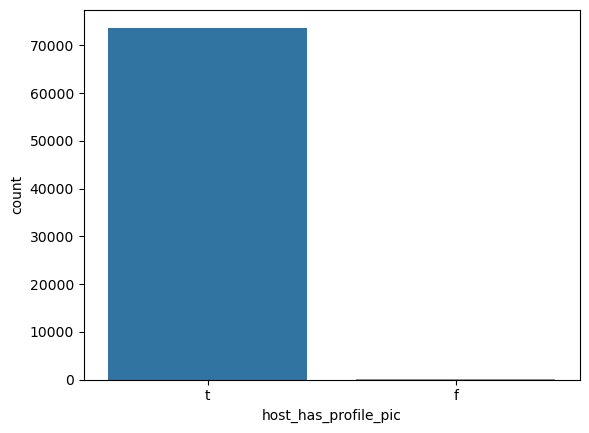

In [146]:
sns.countplot(x = df2['host_has_profile_pic'])

In [147]:
df2.drop('host_has_profile_pic', axis = 1, inplace = True)

### host_identity_verified

<AxesSubplot: xlabel='host_identity_verified', ylabel='count'>

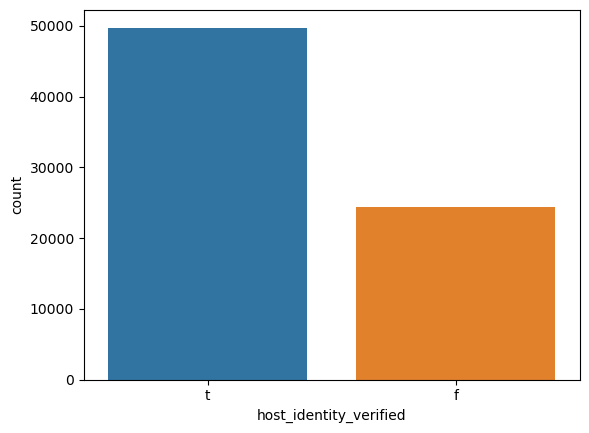

In [183]:
sns.countplot(x = df2['host_identity_verified'])

In [ ]:
# host identity verified가 미확인 : false와 의미가 같다고 생각해서 f로 처리

In [181]:
df2['host_identity_verified'].fillna('f', inplace = True)

In [182]:
df2['host_identity_verified'].isnull().sum()

0

In [184]:
#factorize
host_identity_facted = pd.factorize(df2['host_identity_verified'])
host_identity_factorized = pd.DataFrame(host_identity_facted[0], columns = ['host_identity_factorized'])
host_identity_factorized.host_identity_factorized.value_counts()

0    49748
1    24363
Name: host_identity_factorized, dtype: int64

### instant_bookable

In [151]:
df2['instant_bookable'].value_counts()

f    54660
t    19451
Name: instant_bookable, dtype: int64

In [152]:
df2['instant_bookable'].isnull().sum()

0

<AxesSubplot: xlabel='instant_bookable', ylabel='count'>

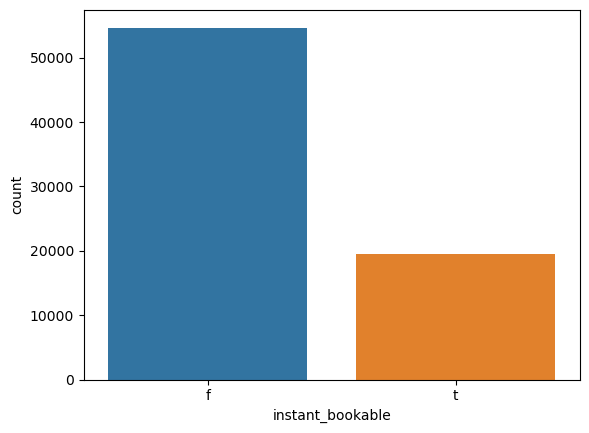

In [153]:
sns.countplot(x=df2['instant_bookable'])

In [188]:
# factorize
instant_bookable_facted = pd.factorize(df2['instant_bookable'])

In [189]:
instant_bookable_factorized = pd.DataFrame(instant_bookable_facted[0], columns = ['instant_bookable_factorized'])

In [190]:
instant_bookable_factorized.instant_bookable_factorized.value_counts()

0    54660
1    19451
Name: instant_bookable_factorized, dtype: int64

### cleaning_fee

In [164]:
df2['cleaning_fee'].value_counts()

True     54403
False    19708
Name: cleaning_fee, dtype: int64

In [186]:
df2['cleaning_fee'].isnull().sum()

0

<AxesSubplot: xlabel='cleaning_fee', ylabel='count'>

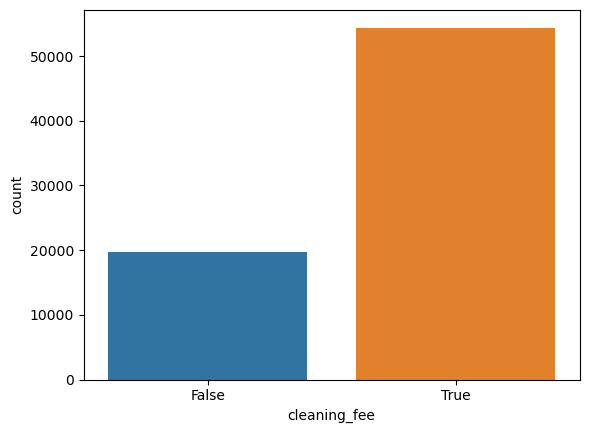

In [187]:
sns.countplot(x=df2['cleaning_fee'])

In [191]:
# factorize
cleaning_fee_facted = pd.factorize(df2['cleaning_fee'])

In [194]:
cleaning_fee_factorized = pd.DataFrame(cleaning_fee_facted[0], columns = ['cleaning_fee_factorized'])

In [195]:
cleaning_fee_factorized.cleaning_fee_factorized.value_counts()

0    54403
1    19708
Name: cleaning_fee_factorized, dtype: int64

In [165]:
df2['instant_bookable'].value_counts()

f    54660
t    19451
Name: instant_bookable, dtype: int64

In [166]:
df2['host_identity_verified'].value_counts()

t    49748
f    24175
Name: host_identity_verified, dtype: int64

### df3 : factorized된 세 컬럼을 통합
- host_identity_factorized, 
- cleaning_fee_factorized, 
- instant_bookable_factorized 합쳐서 새 데이터 프레임 만들기

In [202]:
df3 = pd.concat([df2, host_identity_factorized, cleaning_fee_factorized, instant_bookable_factorized], axis = 1)

In [203]:
df3

,log_price,accommodates,bathrooms,cleaning_fee,host_identity_verified,instant_bookable,latitude,longitude,bedrooms,beds,...,Real Bed,Boston,Chicago,DC,LA,NYC,SF,host_identity_factorized,cleaning_fee_factorized,instant_bookable_factorized
0,5.010635,3,1.0,True,t,f,40.696524,-73.991617,1.0,1.0,...,1,0,0,0,0,1,0,0,0,0
1,5.129899,7,1.0,True,f,t,40.766115,-73.989040,3.0,3.0,...,1,0,0,0,0,1,0,1,0,1
2,4.976734,5,1.0,True,t,t,40.808110,-73.943756,1.0,3.0,...,1,0,0,0,0,1,0,0,0,1
3,6.620073,4,1.0,True,t,f,37.772004,-122.431619,2.0,2.0,...,1,0,0,0,0,0,1,0,0,0
4,4.744932,2,1.0,True,t,t,38.925627,-77.034596,0.0,1.0,...,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,4.605170,1,1.0,False,t,f,40.709025,-73.939405,1.0,1.0,...,1,0,0,0,0,1,0,0,1,0
74107,5.043425,4,2.0,True,f,f,33.871549,-118.396053,2.0,4.0,...,1,0,0,0,1,0,0,1,0,0
74108,5.220356,5,1.0,True,t,t,40.706749,-73.942377,2.0,2.0,...,1,0,0,0,0,1,0,0,0,1
74109,5.273000,2,1.0,True,f,t,40.738535,-74.000157,0.0,2.0,...,1,0,0,0,0,1,0,1,0,1


### 기존 host_identity_verified, cleaning_fee, instant_bookable 컬럼 삭제

In [204]:
df3.drop(['host_identity_verified', 'cleaning_fee', 'instant_bookable'], axis = 1, inplace = True)

In [205]:
df3

,log_price,accommodates,bathrooms,latitude,longitude,bedrooms,beds,amenities_count,flexible,moderate,...,Real Bed,Boston,Chicago,DC,LA,NYC,SF,host_identity_factorized,cleaning_fee_factorized,instant_bookable_factorized
0,5.010635,3,1.0,40.696524,-73.991617,1.0,1.0,9,0,0,...,1,0,0,0,0,1,0,0,0,0
1,5.129899,7,1.0,40.766115,-73.989040,3.0,3.0,15,0,0,...,1,0,0,0,0,1,0,1,0,1
2,4.976734,5,1.0,40.808110,-73.943756,1.0,3.0,19,0,1,...,1,0,0,0,0,1,0,0,0,1
3,6.620073,4,1.0,37.772004,-122.431619,2.0,2.0,15,1,0,...,1,0,0,0,0,0,1,0,0,0
4,4.744932,2,1.0,38.925627,-77.034596,0.0,1.0,12,0,1,...,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,4.605170,1,1.0,40.709025,-73.939405,1.0,1.0,1,1,0,...,1,0,0,0,0,1,0,0,1,0
74107,5.043425,4,2.0,33.871549,-118.396053,2.0,4.0,16,0,1,...,1,0,0,0,1,0,0,1,0,0
74108,5.220356,5,1.0,40.706749,-73.942377,2.0,2.0,31,0,1,...,1,0,0,0,0,1,0,0,0,1
74109,5.273000,2,1.0,40.738535,-74.000157,0.0,2.0,15,0,0,...,1,0,0,0,0,1,0,1,0,1


In [207]:
df3.T

,0,1,2,3,4,5,6,7,8,9,...,74101,74102,74103,74104,74105,74106,74107,74108,74109,74110
log_price,5.010635,5.129899,4.976734,6.620073,4.744932,4.442651,4.418841,4.787492,4.787492,3.583519,...,4.584967,4.110874,5.135798,4.356709,4.248495,4.605170,5.043425,5.220356,5.273000,4.852030
accommodates,3.000000,7.000000,5.000000,4.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,...,1.000000,10.000000,2.000000,2.000000,2.000000,1.000000,4.000000,5.000000,2.000000,4.000000
bathrooms,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000
latitude,40.696524,40.766115,40.808110,37.772004,38.925627,37.753164,33.980454,34.046737,37.781128,33.992563,...,34.020021,34.199671,37.789989,41.909067,34.092640,40.709025,33.871549,40.706749,40.738535,33.761096
longitude,-73.991617,-73.989040,-73.943756,-122.431619,-77.034596,-122.429526,-118.462821,-118.260439,-122.501095,-117.895997,...,-118.498239,-118.618070,-122.407384,-87.623046,-118.343921,-73.939405,-118.396053,-73.942377,-74.000157,-118.192409
bedrooms,1.000000,3.000000,1.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,0.000000,1.000000
beds,1.000000,3.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,10.000000,1.000000,1.000000,1.000000,1.000000,4.000000,2.000000,2.000000,2.000000
amenities_count,9.000000,15.000000,19.000000,15.000000,12.000000,10.000000,21.000000,26.000000,21.000000,13.000000,...,12.000000,22.000000,24.000000,26.000000,13.000000,1.000000,16.000000,31.000000,15.000000,18.000000
flexible,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
moderate,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000


### bathrooms

In [209]:
df3['bathrooms'].value_counts()

1.0    58099
2.0     7936
1.5     3801
2.5     1567
3.0     1066
3.5      429
4.0      286
0.5      209
0.0      198
4.5      116
5.0       72
8.0       41
5.5       39
6.0       24
6.5       12
7.0       10
7.5        6
Name: bathrooms, dtype: int64

In [214]:
df3['bathrooms'].isnull().sum()

200

<AxesSubplot: xlabel='bathrooms'>

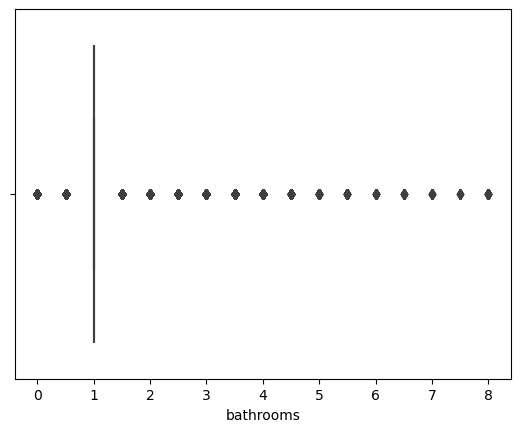

In [211]:
sns.boxplot(x = df3['bathrooms'])

<AxesSubplot: xlabel='bathrooms', ylabel='count'>

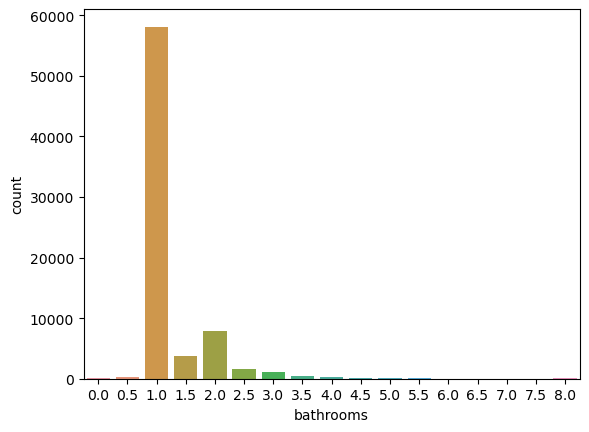

In [212]:
sns.countplot(x = df3['bathrooms'])

In [215]:
# null값 1로 변환
df3['bathrooms'].fillna(1, inplace = True)

In [216]:
df3['bathrooms'].isnull().sum()

0

### bedrooms

In [217]:
df3['bedrooms']

0        1.0
1        3.0
2        1.0
3        2.0
4        0.0
        ... 
74106    1.0
74107    2.0
74108    2.0
74109    0.0
74110    1.0
Name: bedrooms, Length: 74111, dtype: float64

In [219]:
df3['bedrooms'].value_counts()

1.0     49784
2.0     11351
0.0      6715
3.0      4309
4.0      1330
5.0       355
6.0       106
7.0        38
8.0        14
10.0       10
9.0         8
Name: bedrooms, dtype: int64

In [218]:
df3['bedrooms'].isnull().sum()

91

<AxesSubplot: xlabel='bedrooms', ylabel='count'>

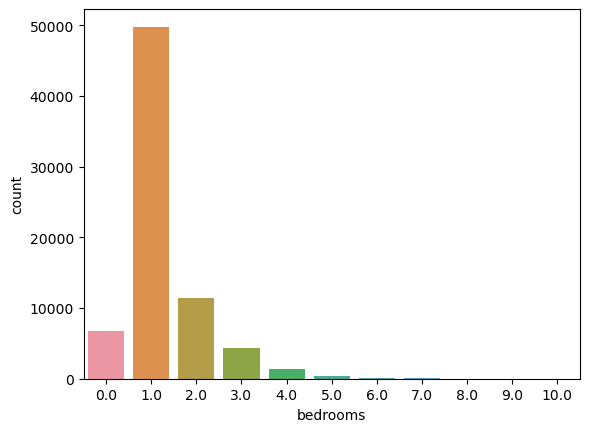

In [220]:
sns.countplot(x = df3['bedrooms'])

### beds

In [221]:
df3['beds'].value_counts()

1.0     45144
2.0     16704
3.0      6442
4.0      3065
5.0      1287
6.0       661
7.0       216
8.0       186
10.0       88
9.0        72
16.0       38
12.0       29
11.0       23
13.0       10
15.0        6
14.0        4
0.0         4
18.0        1
Name: beds, dtype: int64

In [222]:
df3['beds'].isnull().sum()

131

<AxesSubplot: xlabel='beds', ylabel='count'>

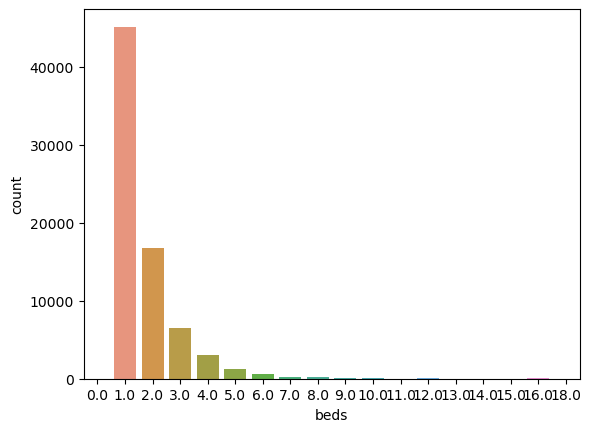

In [223]:
sns.countplot(x = df3['beds'])

### beds, bedrooms, bathrooms 최빈값으로 (simple_imputer)

In [237]:
bed_bath = df3[['beds', 'bedrooms', 'bathrooms']]

In [238]:
bed_bath

,beds,bedrooms,bathrooms
0,1.0,1.0,1.0
1,3.0,3.0,1.0
2,3.0,1.0,1.0
3,2.0,2.0,1.0
4,1.0,0.0,1.0
...,...,...,...
74106,1.0,1.0,1.0
74107,4.0,2.0,2.0
74108,2.0,2.0,1.0
74109,2.0,0.0,1.0


In [239]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'most_frequent')
imputer.fit(bed_bath)
bed_bath_imputed = imputer.transform(bed_bath)

In [254]:
bed_bath_imputed_df = pd.DataFrame(bed_bath_imputed, columns = ['beds_imputed', 'bedrooms_imputed', 'bathrooms_imputed'], index = bed_bath.index)

In [255]:
bed_bath_imputed_df.isnull().sum()

beds_imputed         0
bedrooms_imputed     0
bathrooms_imputed    0
dtype: int64

### beds_imputed, bedrooms_imputed, bathrooms_imputed가 제대로 매칭된건지 확인해봐야 함

In [257]:
bed_bath_imputed_df

,beds_imputed,bedrooms_imputed,bathrooms_imputed
0,1.0,1.0,1.0
1,3.0,3.0,1.0
2,3.0,1.0,1.0
3,2.0,2.0,1.0
4,1.0,0.0,1.0
...,...,...,...
74106,1.0,1.0,1.0
74107,4.0,2.0,2.0
74108,2.0,2.0,1.0
74109,2.0,0.0,1.0


### df3과 bed_bath_imputed_df를 통합한 최종 데이터프레임 생성

In [258]:
new_df = pd.concat([df3, bed_bath_imputed_df], axis = 1)

In [259]:
new_df

,log_price,accommodates,bathrooms,latitude,longitude,bedrooms,beds,amenities_count,flexible,moderate,...,DC,LA,NYC,SF,host_identity_factorized,cleaning_fee_factorized,instant_bookable_factorized,beds_imputed,bedrooms_imputed,bathrooms_imputed
0,5.010635,3,1.0,40.696524,-73.991617,1.0,1.0,9,0,0,...,0,0,1,0,0,0,0,1.0,1.0,1.0
1,5.129899,7,1.0,40.766115,-73.989040,3.0,3.0,15,0,0,...,0,0,1,0,1,0,1,3.0,3.0,1.0
2,4.976734,5,1.0,40.808110,-73.943756,1.0,3.0,19,0,1,...,0,0,1,0,0,0,1,3.0,1.0,1.0
3,6.620073,4,1.0,37.772004,-122.431619,2.0,2.0,15,1,0,...,0,0,0,1,0,0,0,2.0,2.0,1.0
4,4.744932,2,1.0,38.925627,-77.034596,0.0,1.0,12,0,1,...,1,0,0,0,0,0,1,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,4.605170,1,1.0,40.709025,-73.939405,1.0,1.0,1,1,0,...,0,0,1,0,0,1,0,1.0,1.0,1.0
74107,5.043425,4,2.0,33.871549,-118.396053,2.0,4.0,16,0,1,...,0,1,0,0,1,0,0,4.0,2.0,2.0
74108,5.220356,5,1.0,40.706749,-73.942377,2.0,2.0,31,0,1,...,0,0,1,0,0,0,1,2.0,2.0,1.0
74109,5.273000,2,1.0,40.738535,-74.000157,0.0,2.0,15,0,0,...,0,0,1,0,1,0,1,2.0,0.0,1.0


### 기존 beds, bedrooms, bathrooms컬럼 삭제

In [260]:
new_df.drop(['beds', 'bedrooms', 'bathrooms'], axis = 1, inplace = True)

In [261]:
new_df

,log_price,accommodates,latitude,longitude,amenities_count,flexible,moderate,strict,super_strict_30,super_strict_60,...,DC,LA,NYC,SF,host_identity_factorized,cleaning_fee_factorized,instant_bookable_factorized,beds_imputed,bedrooms_imputed,bathrooms_imputed
0,5.010635,3,40.696524,-73.991617,9,0,0,1,0,0,...,0,0,1,0,0,0,0,1.0,1.0,1.0
1,5.129899,7,40.766115,-73.989040,15,0,0,1,0,0,...,0,0,1,0,1,0,1,3.0,3.0,1.0
2,4.976734,5,40.808110,-73.943756,19,0,1,0,0,0,...,0,0,1,0,0,0,1,3.0,1.0,1.0
3,6.620073,4,37.772004,-122.431619,15,1,0,0,0,0,...,0,0,0,1,0,0,0,2.0,2.0,1.0
4,4.744932,2,38.925627,-77.034596,12,0,1,0,0,0,...,1,0,0,0,0,0,1,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,4.605170,1,40.709025,-73.939405,1,1,0,0,0,0,...,0,0,1,0,0,1,0,1.0,1.0,1.0
74107,5.043425,4,33.871549,-118.396053,16,0,1,0,0,0,...,0,1,0,0,1,0,0,4.0,2.0,2.0
74108,5.220356,5,40.706749,-73.942377,31,0,1,0,0,0,...,0,0,1,0,0,0,1,2.0,2.0,1.0
74109,5.273000,2,40.738535,-74.000157,15,0,0,1,0,0,...,0,0,1,0,1,0,1,2.0,0.0,1.0


In [262]:
new_df.isnull().sum()

log_price                      0
accommodates                   0
latitude                       0
longitude                      0
amenities_count                0
flexible                       0
moderate                       0
strict                         0
super_strict_30                0
super_strict_60                0
Entire home/apt                0
Private room                   0
Shared room                    0
Airbed                         0
Couch                          0
Futon                          0
Pull-out Sofa                  0
Real Bed                       0
Boston                         0
Chicago                        0
DC                             0
LA                             0
NYC                            0
SF                             0
host_identity_factorized       0
cleaning_fee_factorized        0
instant_bookable_factorized    0
beds_imputed                   0
bedrooms_imputed               0
bathrooms_imputed              0
dtype: int